In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session,sessionmaker
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn=engine.connect()

In [6]:
# reflect an existing database into a new model
# automap base
Base = automap_base()

In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
m_t=Base.classes.measurement
s_t=Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [11]:
#Create Dataframes to make the querys
m_df=pd.read_sql_query("SELECT * FROM measurement",conn)
m_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [12]:
#Create Dataframes to make the querys
m_df=pd.read_sql_query("SELECT * FROM station",conn)
m_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
max_id=session.query(func.max(m_t.date)).scalar()
print(max_id)

2017-08-23


In [14]:
# Calculate the date 1 year ago from the last data point in the database
max_date=dt.date(2017,8,23)
year_Ago=max_date-dt.timedelta(days=365)
print(f"Date year ago: ",year_Ago)


Date year ago:  2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores
data=[m_t.date,m_t.prcp]
prcp_data=session.query(*data).\
    filter(m_t.date<=max_date).\
    filter(m_t.date>=year_Ago).all()
prcp_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(prcp_data,columns=["Date","Precipitation level"])
# Sort the dataframe by date
prcp_df=prcp_df.sort_values(by="Date")
prcp_df.head(5)

,Date,Precipitation level
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


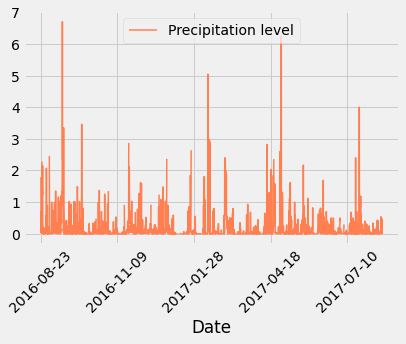

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x="Date",y="Precipitation level",color='coral',linewidth=1.5)
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend(loc="upper center")
plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
round(prcp_df.describe(),2)

,Precipitation level
count,2021.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


In [19]:
# Design a query to show how many stations are available in this dataset?
available_stations=session.query(s_t).group_by(s_t.station).count()
available_stations

9

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
act_stations=session.query(m_t.station,func.count(m_t.station)).group_by(m_t.station).order_by(func.count(m_t.station).desc()).all()
act_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station=act_stations[0][0]
mactive_temps = session.query(func.min(m_t.tobs), func.max(m_t.tobs),
                                  func.avg(m_t.tobs)).filter(m_t.station == most_active_station).all()
print(f"Most Active Station Temperatures")
print(f"Low: {mactive_temps[0][0]} High: {mactive_temps[0][1]} Average: {round(mactive_temps[0][2], 1)}")

Most Active Station Temperatures
Low: 54.0 High: 85.0 Average: 71.7


In [22]:
# Choose the station with the highest number of temperature observations.
M_A = session.query(m_t.station, s_t.name, func.count(m_t.station)).\
filter(m_t.station == s_t.station).group_by(m_t.station)\
.order_by(func.count(m_t.station).desc()).first()

M_A


('USC00519281', 'WAIHEE 837.5, HI US', 2772)

In [23]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tdata = [m_t.date, m_t.tobs, m_t.station]

temp_data = session.query(*tdata).\
    filter(m_t.station=='USC00519281').\
    filter(m_t.date <= max_date).\
    filter(m_t.date >= year_Ago).all()

temp_data

tobs_df = pd.DataFrame(temp_data, columns=['date','tobs','station'])
tobs = tobs_df['tobs']
tobs_df.head()

,date,tobs,station
0,2016-08-23,77.0,USC00519281
1,2016-08-24,77.0,USC00519281
2,2016-08-25,80.0,USC00519281
3,2016-08-26,80.0,USC00519281
4,2016-08-27,75.0,USC00519281


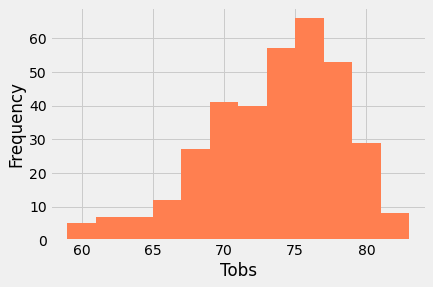

In [24]:
plt.hist(tobs, bins=12,color="coral")
plt.xlabel('Tobs')
plt.ylabel('Frequency')
plt.show()

# Part 2

In [25]:
from flask import Flask

In [26]:
app=Flask(__name__)

In [27]:
@app.route("/")
def index():
    """List all api routes that are available."""
    return(
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start><br/>"
        f"/api/v1.0/<start>/<end><br/>"
    )

In [28]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    maxDate = dt.date(2017, 8 ,23)
    year_ago = maxDate - dt.timedelta(days=365)

    past_temp = (session.query(m_t.date, m_t.prcp)
                .filter(m_t.date <= maxDate)
                .filter(m_t.date >= year_ago)
                .order_by(m_t.date).all())
    
    precip = {date: prcp for date, prcp in past_temp}
    
    return jsonify(precip)

In [29]:
@app.route('/api/v1.0/stations')
def stations():

    stations_all = session.query(s_t.station).all()

    return jsonify(stations_all)

In [30]:
@app.route('/api/v1.0/tobs') 
def tobs():  
    maxDate = dt.date(2017, 8 ,23)
    year_ago = maxDate - dt.timedelta(days=365)

    ly = (session.query(m_t.tobs)
                .filter(m_t.station == most_active_station)
                .filter(m_t.date <= maxDate)
                .filter(m_t.date >= year_ago)
                .order_by(m_t.tobs).all())
    
    return jsonify(ly)

In [31]:
@app.route('/api/v1.0/<start>') 
def start(start=None):
    maxDate = dt.date(2017, 8 ,23)
    tobs_only = (session.query(m_t.tobs).filter(m_t.date.between(start, maxDate)).all())
    
    tobs_df = pd.DataFrame(tobs_only)

    tavg = tobs_df["tobs"].mean()
    tmax = tobs_df["tobs"].max()
    tmin = tobs_df["tobs"].min()
    
    return jsonify(tavg, tmax, tmin)

In [32]:
@app.route('/api/v1.0/<start>/<end>') 
def se(start=None, end=None):

    tobs_only = (session.query(m_t.tobs).filter(m_t.date.between(start, end)).all())
    
    tobs_df = pd.DataFrame(tobs_only)

    tavg = tobs_df["tobs"].mean()
    tmax = tobs_df["tobs"].max()
    tmin = tobs_df["tobs"].min()
    
    return jsonify(tavg, tmax, tmin)

In [33]:
if __name__ == '__main__':
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [26/Nov/2020 01:09:31] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2020 01:09:32] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [26/Nov/2020 01:10:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2020 01:10:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2020 01:11:11] "GET / HTTP/1.1" 200 -


## Bonus Challenge Assignment

In [34]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(m_t.tobs), func.avg(m_t.tobs), func.max(m_t.tobs)).\
        filter(m_t.date >= start_date).filter(m_t.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [35]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
mydate=dt.date(2017,6,7)
xya=mydate-dt.timedelta(days=365)
print(f"A year ago was:",xya )

A year ago was: 2016-06-07


In [36]:
def calc_temps(start_date, end_date):
    return session.query(func.min(m_t.tobs), func.avg(m_t.tobs), func.max(m_t.tobs)).\
        filter(m_t.date >= start_date).filter(m_t.date <= end_date).all()

# function usage example
print(calc_temps('2016-06-07', '2016-06-21'))

[(69.0, 75.43434343434343, 81.0)]


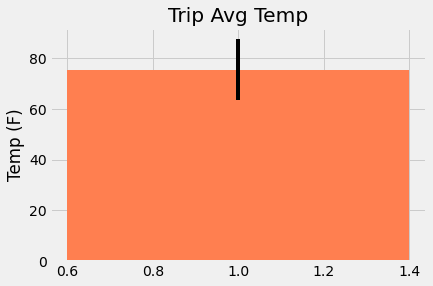

In [37]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
max=81.0
min=69.0
avg=75.43
dif=max-min

plt.bar(1,avg,yerr=dif,color="coral")
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")
plt.show()

In [38]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

endDate = dt.date(2016, 6 ,7)
year_ago2 = endDate - dt.timedelta(days=365)

sel = [m_t.station, m_t.prcp, s_t.name, s_t.longitude, s_t.latitude, s_t.elevation]

rainfall_data = session.query(*sel).\
    filter(m_t.date <= endDate).\
    filter(m_t.date >= year_ago2).\
    group_by(s_t.name).\
    order_by(m_t.prcp).all()

rainfall_data

[('USC00519397',
  0.0,
  'HONOLULU OBSERVATORY 702.2, HI US',
  -157.9992,
  21.3152,
  0.9),
 ('USC00519397', 0.0, 'KANEOHE 838.1, HI US', -157.8015, 21.4234, 14.6),
 ('USC00519397',
  0.0,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  -157.8374,
  21.5213,
  7.0),
 ('USC00519397',
  0.0,
  'MANOA LYON ARBO 785.2, HI US',
  -157.8025,
  21.3331,
  152.4),
 ('USC00519397', 0.0, 'PEARL CITY, HI US', -157.9751, 21.3934, 11.9),
 ('USC00519397', 0.0, 'UPPER WAHIAWA 874.3, HI US', -158.0111, 21.4992, 306.6),
 ('USC00519397',
  0.0,
  'WAIHEE 837.5, HI US',
  -157.84888999999998,
  21.45167,
  32.9),
 ('USC00519397', 0.0, 'WAIKIKI 717.2, HI US', -157.8168, 21.2716, 3.0),
 ('USC00519397',
  0.0,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  -157.71139,
  21.33556,
  19.5)]

In [39]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(m_t.tobs), func.avg(m_t.tobs), func.max(m_t.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", m_t.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [40]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-06-07'
end_date ='2017-06-21'
# Use the start and end date to create a range of dates

dates = session.query(m_t.date).filter(m_t.date >= start_date).filter(m_t.date <= end_date).group_by(m_t.date).all()

# List comprehension to get the elements in the tuple from the dates query 
trip_dates = [x[0] for x in dates]

# Stip off the year and save a list of %m-%d strings with another list comprehension 
trip_dates_stripped= [x[5:] for x in trip_dates]

# Find the start month/day and the end month/day 
start_month_day = trip_dates_stripped[0]
end_month_day = trip_dates_stripped[-1]


#daily_normals = [session.query(func.min(m_t.tobs),func.avg(m_t.tobs), func.max(m_t.tobs)).filter(m_t.date >= start_date).filter(m_t.date <= end_date).group_by(m_t.date).all()]
    
# Loop through the list of %m-%d strings and calculate the normals for each date    
daily_normals = [session.query(func.min(m_t.tobs),
                       func.avg(m_t.tobs),
                       func.max(m_t.tobs)).filter(func.strftime("%m-%d", m_t.date) >= start_month_day).filter(func.strftime("%m-%d", m_t.date) <= end_month_day).group_by(func.strftime("%m-%d", m_t.date)).all()]

daily_normals = daily_normals[0]
print("Daily Normals for 06-07 to 06-21")
daily_normals

Daily Normals for 06-07 to 06-21


[(68.0, 75.07142857142857, 81.0),
 (70.0, 75.58620689655173, 81.0),
 (69.0, 75.15254237288136, 81.0),
 (68.0, 75.14285714285714, 81.0),
 (69.0, 76.01960784313725, 84.0),
 (66.0, 75.66666666666667, 83.0),
 (68.0, 75.66666666666667, 81.0),
 (69.0, 75.62711864406779, 81.0),
 (67.0, 75.40350877192982, 81.0),
 (69.0, 75.41379310344827, 81.0),
 (68.0, 74.59322033898304, 81.0),
 (69.0, 74.60344827586206, 80.0),
 (70.0, 75.44067796610169, 82.0),
 (68.0, 73.96491228070175, 85.0),
 (68.0, 74.75862068965517, 82.0)]

In [41]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# Create a dataframe from the previous query 
daily_normals_df= pd.DataFrame(daily_normals,columns=['min', 'avg', 'max'])

# Add trip_dates to Pandas DataFrame
daily_normals_df['date']= trip_dates

# Change datatype from element to datetime object on Pandas, makes x axis title to add 
daily_normals_df['date'] = pd.to_datetime(daily_normals_df['date'], format='%Y-%m-%d')

# Set index to date
daily_normals_df.set_index('date',inplace=True)

daily_normals_df

,min,avg,max
date,,,
2017-06-07,68.0,75.071429,81.0
2017-06-08,70.0,75.586207,81.0
2017-06-09,69.0,75.152542,81.0
2017-06-10,68.0,75.142857,81.0
2017-06-11,69.0,76.019608,84.0
2017-06-12,66.0,75.666667,83.0
2017-06-13,68.0,75.666667,81.0
2017-06-14,69.0,75.627119,81.0
2017-06-15,67.0,75.403509,81.0


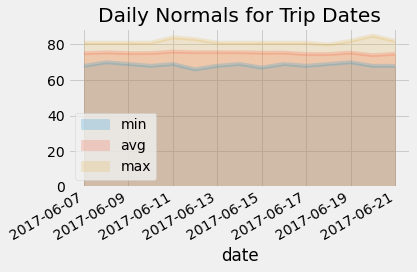

In [42]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normals_df.plot(kind='area', alpha=.2, stacked=False, x_compat=True, title="Daily Normals for Trip Dates")
plt.tight_layout()
plt.show()